### Machine Learning
#### Bambee Garfield
#### Northwest Missouri State University
#### Data Analytics Capstone Project

##### Load & Prepare Data   

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('updated_data.csv')

# Encode diagnosis as binary
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Features and target
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']
X = data[features]
y = data['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Train the Model

In [2]:
# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

ValueError: Input y contains NaN.

#### Get Feature Importances

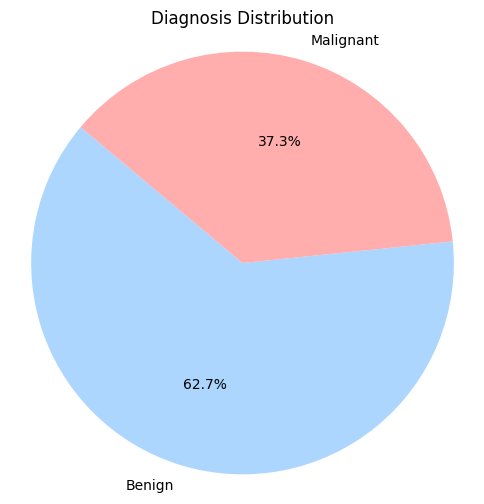


Pie chart saved as 'eda-graphs\diagnosis_pie_chart.png'


In [ ]:
# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()